In [28]:
import pandas as pd
import regex as re

CORRESPONDANCES = {'W': '-', 'E': '+', 'S': '-', 'N': '+'}

def coord_to_float(coordinate: str) -> float:
    pattern = re.compile(r"([\d]+)°([\d]+)?'?(\d+(?:\.\d+)?)?'' ?([NSEW])")
    match = re.search(pattern, coordinate)
    gra, min, sec = float(match[1]), float(match[2] or 0), float(match[3] or 0)
    min += sec / 60
    gra += min / 60
    dir = match[4]
    gra = float(CORRESPONDANCES[dir] + str(gra))
    return gra




callejero = pd.read_csv('direcciones.csv', encoding='latin1', sep=';')
callejero = callejero[['VIA_CLASE', 'VIA_PAR', 'VIA_NOMBRE', 'NUMERO', 'LATITUD', 'LONGITUD']]

# Coordenadas en float
callejero['FLOAT_LATITUD'] = callejero['LATITUD'].apply(coord_to_float)
callejero['FLOAT_LONGITUD'] = callejero['LONGITUD'].apply(coord_to_float)

def replace_nans(par):
    if str(par).lower() == 'nan':
        return ""
    else:
        return str(par) + " "

callejero['VIA_PAR'] = callejero['VIA_PAR'].apply(replace_nans)
callejero['NOMBRE_COMPLETO'] = callejero['VIA_CLASE'] + " " + callejero['VIA_PAR'] + callejero['VIA_NOMBRE'] + ", " + callejero['NUMERO'].astype(str)
callejero

,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUMERO,LATITUD,LONGITUD,FLOAT_LATITUD,FLOAT_LONGITUD,NOMBRE_COMPLETO
0,AUTOVÍA,,A-1,10000,40°29'21.84'' N,3°40'23.56'' W,40.489400,-3.673211,"AUTOVÍA A-1, 10000"
1,AUTOVÍA,,A-1,10000,40°29'21.45'' N,3°40'20.75'' W,40.489292,-3.672431,"AUTOVÍA A-1, 10000"
2,AUTOVÍA,,A-1,11000,40°29'48.13'' N,3°39'57.53'' W,40.496703,-3.665981,"AUTOVÍA A-1, 11000"
3,AUTOVÍA,,A-1,11000,40°29'46.27'' N,3°39'54.87'' W,40.496186,-3.665242,"AUTOVÍA A-1, 11000"
4,AUTOVÍA,,A-1,12000,40°30'13.33'' N,3°39'33.27'' W,40.503703,-3.659242,"AUTOVÍA A-1, 12000"
...,...,...,...,...,...,...,...,...,...
213231,PASEO,DEL,ZURRON,49,40°28'10.77'' N,3°35'5.92'' W,40.469658,-3.584978,"PASEO DEL ZURRON, 49"
213232,PASEO,DEL,ZURRON,51,40°28'10.81'' N,3°35'3.32'' W,40.469669,-3.584256,"PASEO DEL ZURRON, 51"
213233,PASEO,DEL,ZURRON,53,40°28'11.34'' N,3°35'2.07'' W,40.469817,-3.583908,"PASEO DEL ZURRON, 53"
213234,PASEO,DEL,ZURRON,55,40°28'11.19'' N,3°35'1.02'' W,40.469775,-3.583617,"PASEO DEL ZURRON, 55"


In [30]:
direccion = 'PASEO DEL ZURRON, 49'

# direccion.upper() in callejero['NOMBRE_COMPLETO'].unique():
print(callejero[callejero['NOMBRE_COMPLETO'] == 'CALLE DE ALBERTO AGUILERA, 23'][['FLOAT_LATITUD', 'FLOAT_LONGITUD']])

      FLOAT_LATITUD  FLOAT_LONGITUD
4562      40.429981       -3.711258


In [42]:
import callejero as ca
import importlib
importlib.reload(ca)

df = ca.carga_callejero()
df

,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUMERO,LATITUD,LONGITUD,FLOAT_LATITUD,FLOAT_LONGITUD,NOMBRE_COMPLETO
0,AUTOVÍA,,A-1,10000,40°29'21.84'' N,3°40'23.56'' W,40.489400,-3.673211,"AUTOVÍA A-1, 10000"
1,AUTOVÍA,,A-1,10000,40°29'21.45'' N,3°40'20.75'' W,40.489292,-3.672431,"AUTOVÍA A-1, 10000"
2,AUTOVÍA,,A-1,11000,40°29'48.13'' N,3°39'57.53'' W,40.496703,-3.665981,"AUTOVÍA A-1, 11000"
3,AUTOVÍA,,A-1,11000,40°29'46.27'' N,3°39'54.87'' W,40.496186,-3.665242,"AUTOVÍA A-1, 11000"
4,AUTOVÍA,,A-1,12000,40°30'13.33'' N,3°39'33.27'' W,40.503703,-3.659242,"AUTOVÍA A-1, 12000"
...,...,...,...,...,...,...,...,...,...
213231,PASEO,DEL,ZURRON,49,40°28'10.77'' N,3°35'5.92'' W,40.469658,-3.584978,"PASEO DEL ZURRON, 49"
213232,PASEO,DEL,ZURRON,51,40°28'10.81'' N,3°35'3.32'' W,40.469669,-3.584256,"PASEO DEL ZURRON, 51"
213233,PASEO,DEL,ZURRON,53,40°28'11.34'' N,3°35'2.07'' W,40.469817,-3.583908,"PASEO DEL ZURRON, 53"
213234,PASEO,DEL,ZURRON,55,40°28'11.19'' N,3°35'1.02'' W,40.469775,-3.583617,"PASEO DEL ZURRON, 55"


In [94]:
importlib.reload(ca)

direccion = 'Calle de Alberto Aguilera, 3'

ca.busca_direccion(direccion, df)



(40.429611111111114, -3.707486111111111)

TypeError: OutEdgeView.__call__() got an unexpected keyword argument 'keys'

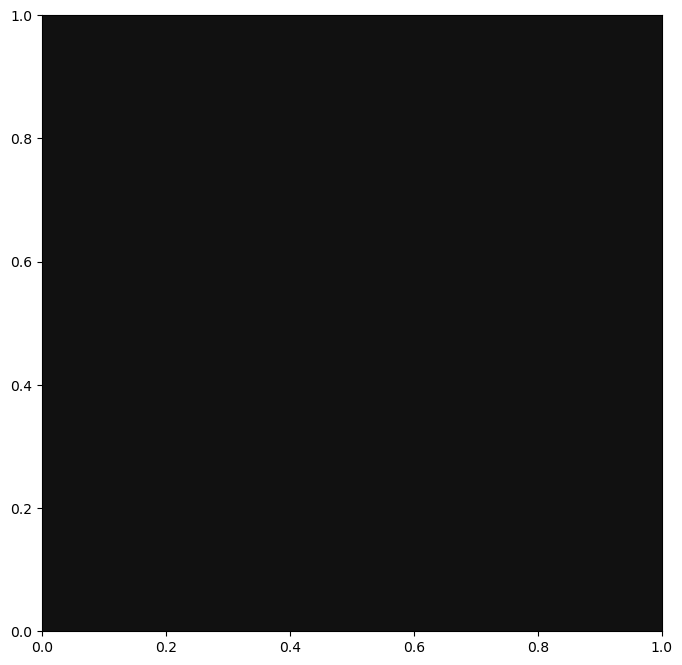

In [100]:
importlib.reload(ca)
ca.carga_grafo()